In [8]:
! pip install mysql-connector-python
! pip install PyMySQL
! pip install ipython-sql
! pip install mysqlclient
! pip install pandas 
! pip install matplotlib 
! pip install seaborn 
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [9]:
import  mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
connection = mysql.connector.connect(
user='root',
password='root',
host='localhost',
database='airline'
)
# Create a cursor object to execute SQL queries
cursor = connection.cursor()

In [11]:
cursor.execute("SELECT * FROM cleaned_air")

In [12]:
cleaned_air = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [13]:
print(cleaned_air.head())

   ï»¿ID  Customer ID  Gender      Customer Type  Age   Type of Travel  \
0      0        70172    Male     Loyal Customer   13  Personal Travel   
1      1         5047    Male  disloyal Customer   25  Business travel   
2      2       110028  Female     Loyal Customer   26  Business travel   
3      3        24026  Female     Loyal Customer   25  Business travel   
4      4       119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight Wifi Service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival Time Convenient  ...  Inflight Entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

In [14]:
# Set the style for seaborn
sns.set(style='whitegrid')

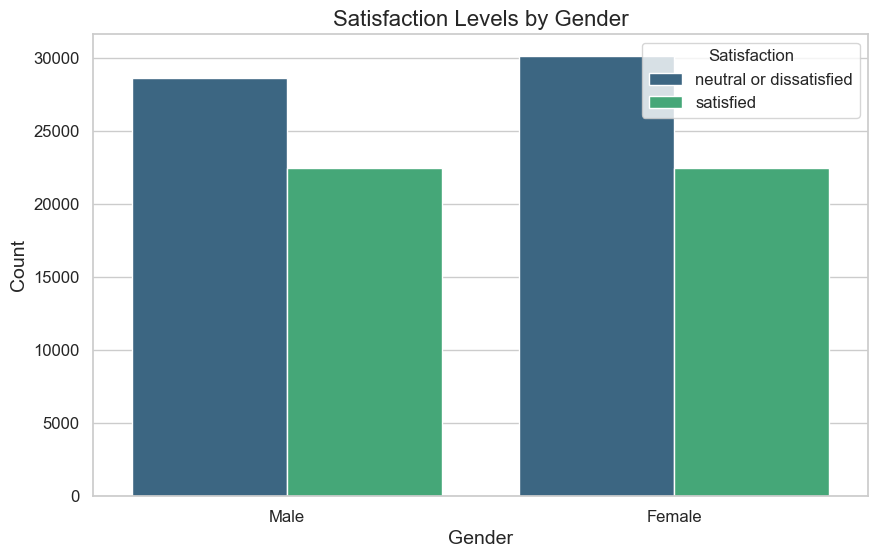

In [15]:
# Function to visualize satisfaction levels by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_air, x='Gender', hue='Satisfaction', palette='viridis')
plt.title('Satisfaction Levels by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Satisfaction', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

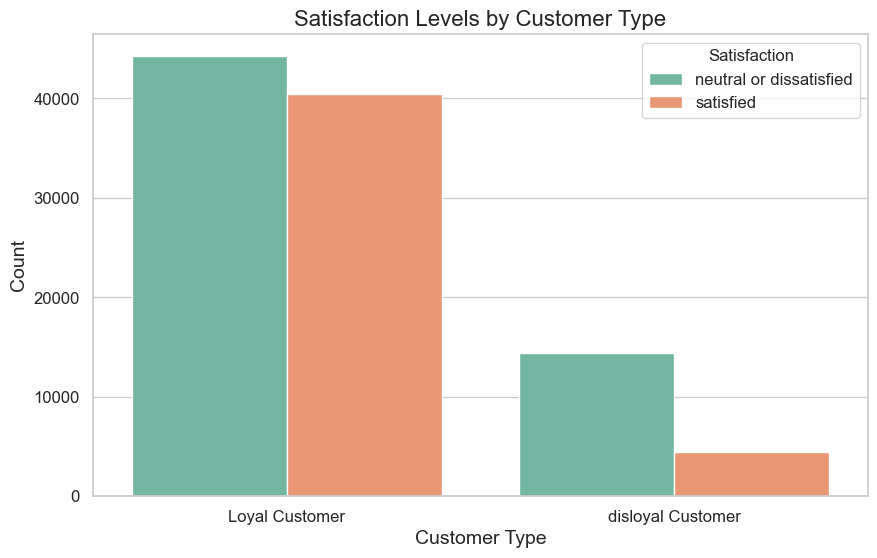

In [16]:
# Function to visualize satisfaction levels by customer type
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_air, x='Customer Type', hue='Satisfaction', palette='Set2')
plt.title('Satisfaction Levels by Customer Type', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Satisfaction', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

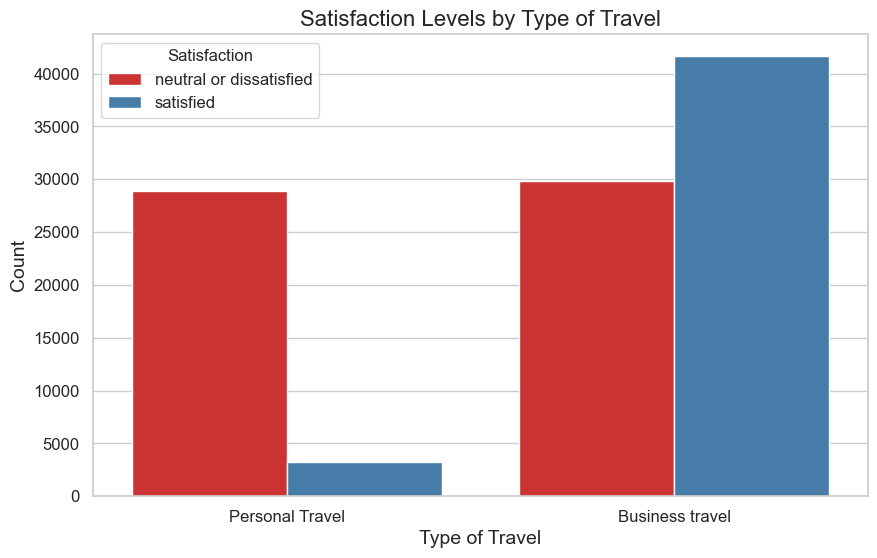

In [17]:
# Function to visualize satisfaction levels by type of travel
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_air, x='Type of Travel', hue='Satisfaction', palette='Set1')
plt.title('Satisfaction Levels by Type of Travel', fontsize=16)
plt.xlabel('Type of Travel', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Satisfaction', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11656\2108274115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_air, x='Satisfaction', y='Age', palette='Set3')


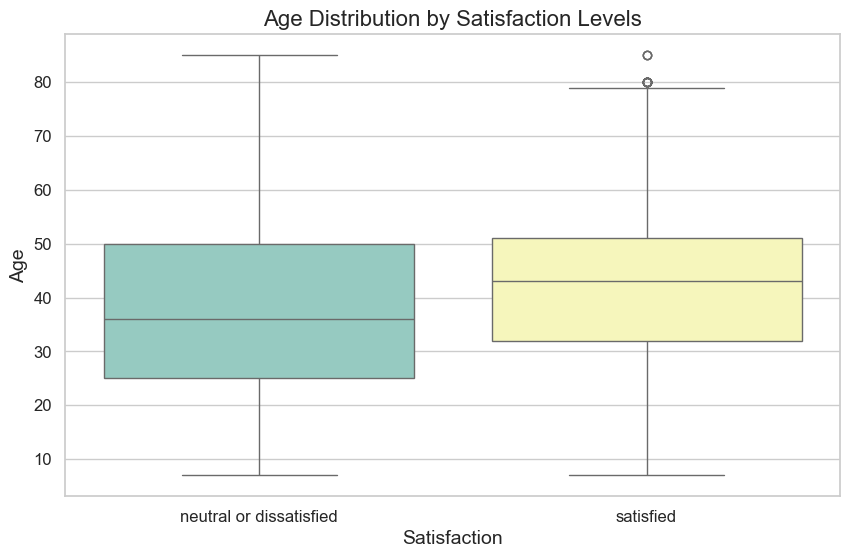

In [18]:
# Function to visualize age distribution by satisfaction levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_air, x='Satisfaction', y='Age', palette='Set3')
plt.title('Age Distribution by Satisfaction Levels', fontsize=16)
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

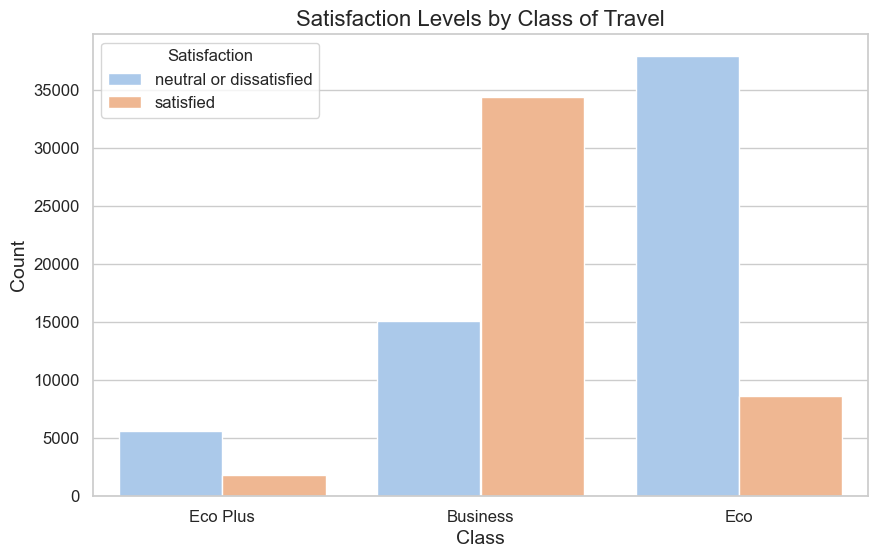

In [19]:
# Function to visualize satisfaction levels by class of travel
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_air, x='Class', hue='Satisfaction', palette='pastel')
plt.title('Satisfaction Levels by Class of Travel', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Satisfaction', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

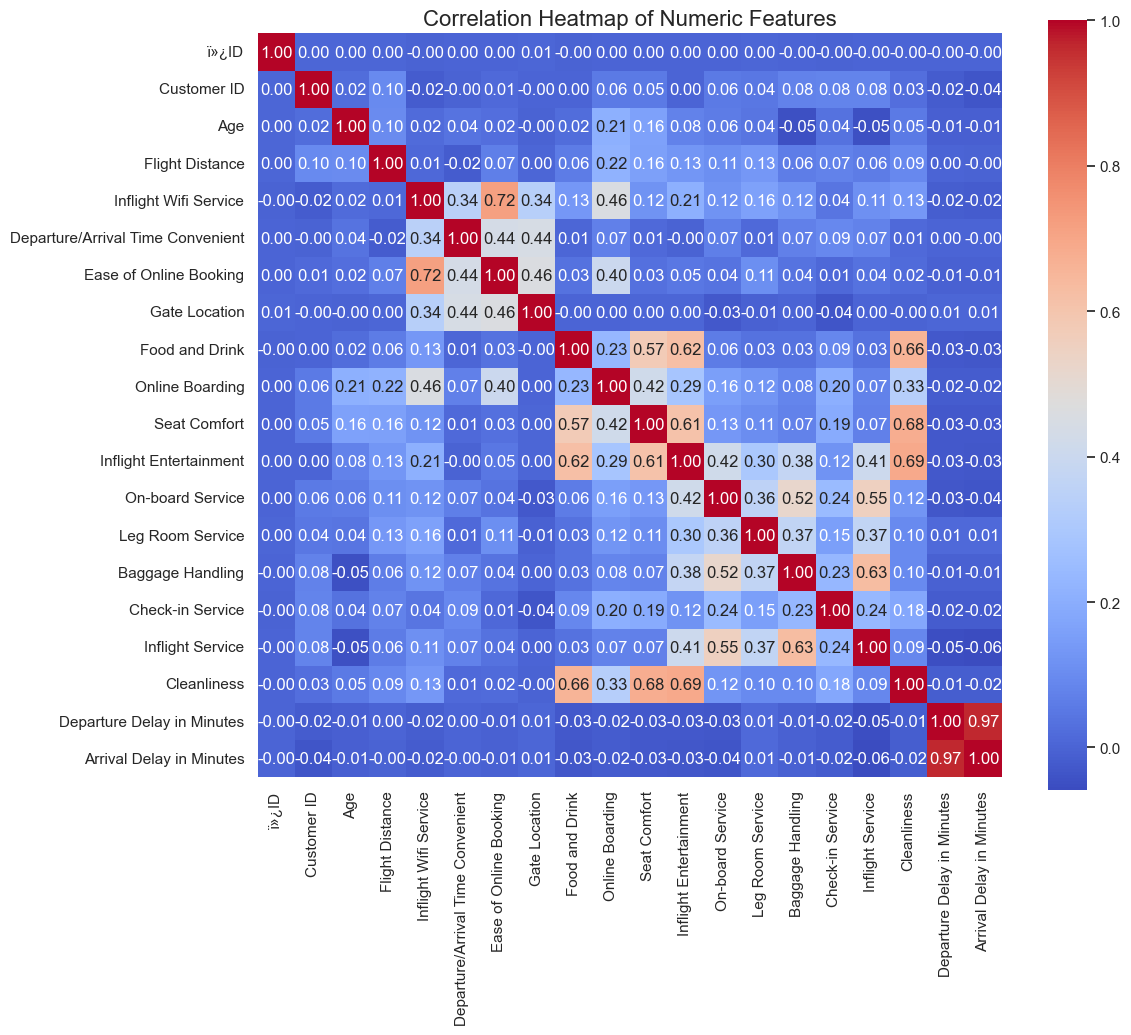

In [20]:
# Function to create a correlation heatmap
# Select only numeric columns for correlation calculation
numeric_columns = cleaned_air.select_dtypes(include='number')
    
# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()
    
# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11656\493147765.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_air, x='Satisfaction', y='Flight Distance', palette='muted')


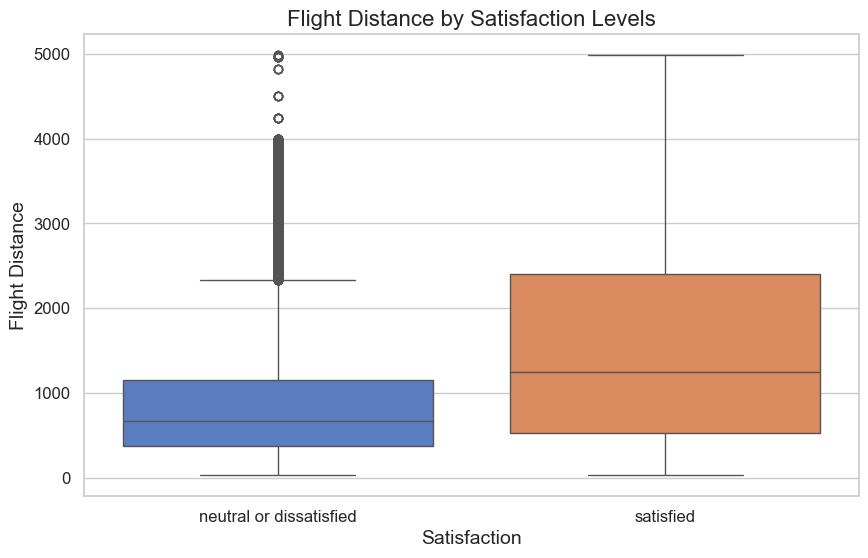

In [21]:
# Function to visualize flight distance by satisfaction levels
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_air, x='Satisfaction', y='Flight Distance', palette='muted')
plt.title('Flight Distance by Satisfaction Levels', fontsize=16)
plt.xlabel('Satisfaction', fontsize=14)
plt.ylabel('Flight Distance', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_11656\1258696050.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Satisfaction', fontsize=12)


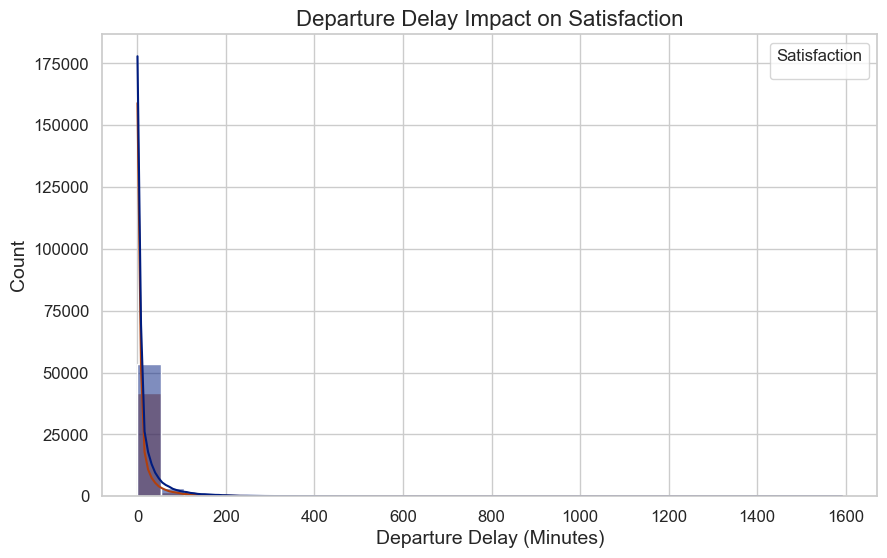

In [22]:
# Function to visualize departure delay impact on satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_air, x='Departure Delay in Minutes', hue='Satisfaction', bins=30, kde=True, palette='dark')
plt.title('Departure Delay Impact on Satisfaction', fontsize=16)
plt.xlabel('Departure Delay (Minutes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Satisfaction', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

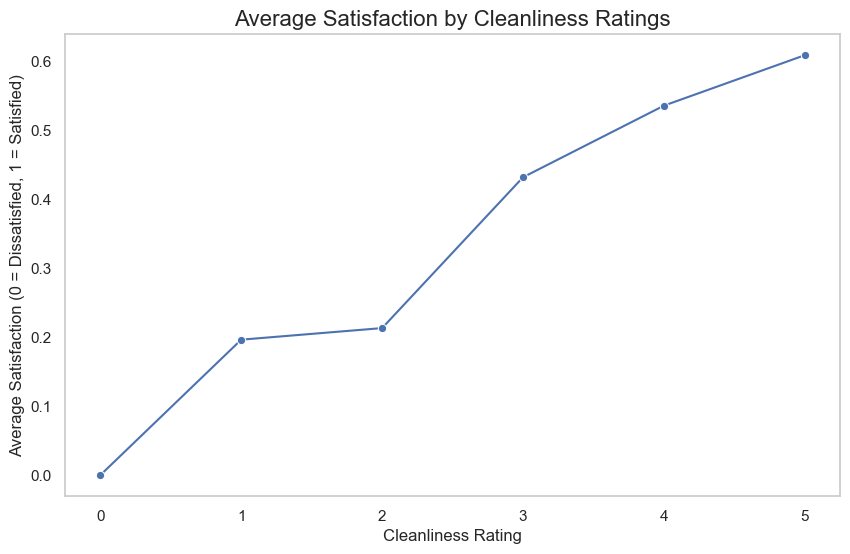

In [23]:
# Function to visualize cleanliness ratings and satisfaction
# Map Satisfaction column to numeric values
satisfaction_mapping = {
    'neutral or dissatisfied': 0,
    'satisfied': 1
}
cleaned_air['Satisfaction_Num'] = cleaned_air['Satisfaction'].map(satisfaction_mapping)

# Group by Cleanliness and calculate the average numeric satisfaction
cleanliness_avg = (
    cleaned_air.groupby('Cleanliness')['Satisfaction_Num']
    .mean()
    .reset_index()
)
    
# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=cleanliness_avg, x='Cleanliness', y='Satisfaction_Num', marker='o', color='b')
plt.title('Average Satisfaction by Cleanliness Ratings', fontsize=16)
plt.xlabel('Cleanliness Rating')
plt.ylabel('Average Satisfaction (0 = Dissatisfied, 1 = Satisfied)')
plt.grid()
plt.show()


In [24]:
print(cleaned_air['Satisfaction'].dtype)
print(cleaned_air['Satisfaction'].unique())

object
['neutral or dissatisfied' 'satisfied']


In [25]:
# Mapping string categories to numeric values
satisfaction_mapping = {
    'very dissatisfied': 1,
    'neutral or dissatisfied': 2,
    'satisfied': 3,
    'very satisfied': 4
}
cleaned_air['Satisfaction'] = cleaned_air['Satisfaction'].map(satisfaction_mapping)


In [26]:
# Drop rows with NaN in Satisfaction after mapping
cleaned_air = cleaned_air.dropna(subset=['Satisfaction'])


In [27]:
checkin_avg = cleaned_air.groupby('Check-in Service')['Satisfaction'].mean().reset_index()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11656\734362452.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=checkin_avg, x='Check-in Service', y='Satisfaction', palette='BuGn')


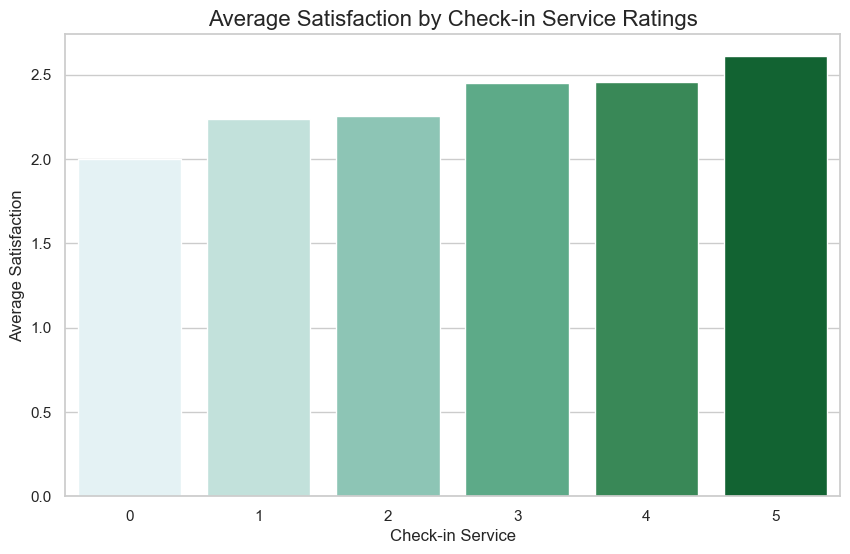

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=checkin_avg, x='Check-in Service', y='Satisfaction', palette='BuGn')
plt.title('Average Satisfaction by Check-in Service Ratings', fontsize=16)
plt.xlabel('Check-in Service')
plt.ylabel('Average Satisfaction')
plt.show()


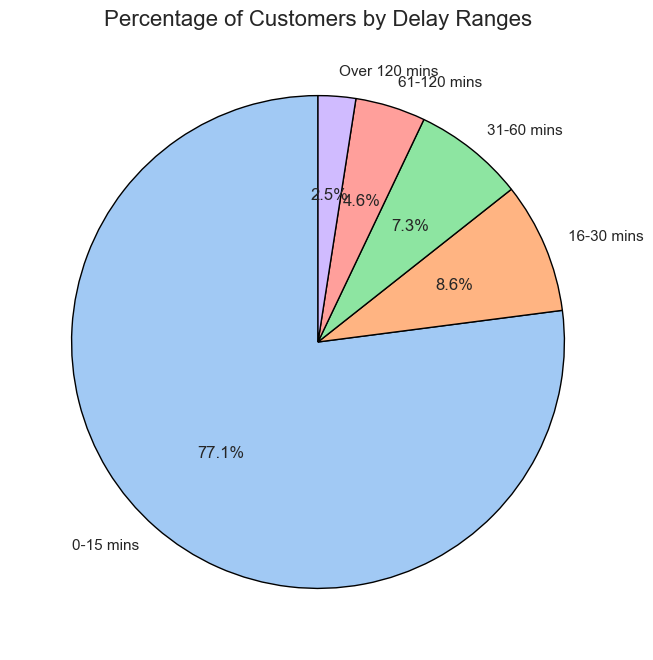

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create bins for delay ranges
bins = [0, 15, 30, 60, 120, float('inf')]
labels = ['0-15 mins', '16-30 mins', '31-60 mins', '61-120 mins', 'Over 120 mins']

# Bin the delay data
cleaned_air['Delay Range'] = pd.cut(cleaned_air['Departure Delay in Minutes'], bins=bins, labels=labels, right=False)

# Calculate delay range counts
delay_range_counts = cleaned_air['Delay Range'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel', len(labels))
plt.pie(delay_range_counts, labels=delay_range_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title('Percentage of Customers by Delay Ranges', fontsize=16)
plt.show()


In [ ]:
Conclusion 

1. Demographics and Loyalty: Gender, age, and loyalty significantly influence satisfaction.
2. Travel Type: Business travelers are more satisfied than personal travelers due to differing priorities.
3. Service Impact: Inflight entertainment, cleanliness, and check-in service strongly affect satisfaction.
4. Delays: Departure and arrival delays are key dissatisfaction drivers.
5. Travel Class: Business and premium economy passengers report higher satisfaction than economy passengers.

In [ ]:
Strategic Recommendations:

1. Elevate Economy Class: Improve seating, entertainment, and complimentary services to enhance satisfaction.
2. Minimize Delays: Optimize ground operations and scheduling to ensure timely flights.
3. Personalize Experiences: Leverage customer data to tailor services and promotions.
4. Retain Loyalty: Offer exclusive rewards and perks to loyal customers.
5. Enhance Training: Invest in employee training for consistent, high-quality service.